In [ ]:
'''
Part 4 - Clustering

A. K-means
K-means algorithm
1. select number of clusters k
2. select seed points or starting points i.e. centroid
3. assign points to nearest centroid
4. compute and place new centroid for each cluster
5. reassign data points to now closest centroid
6. if changed go back to 4 else done

K-means ++ (random starting points i.e. centroid)
this can lead to wrong results. so it is important to 
remember that chosing centroid can and will influence
final result

How to select number of clusters k
within cluster sum of squares wcss = sum(distance(p,c)**2) 

B. Heirarchical Clustering
Two types: Agglomerative and divisive
Agglomerative
1. Each data point is a cluster
2. take two closest data points make them one cluster
3. take the two closest clusters and make them one
4. repeat 3 until only one cluster

HC creates dendograms.
Dendograms remembers all the steps

'''

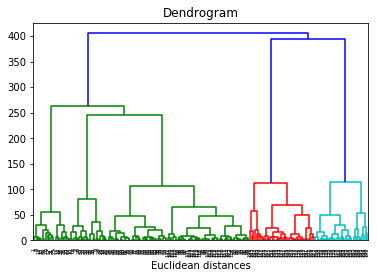

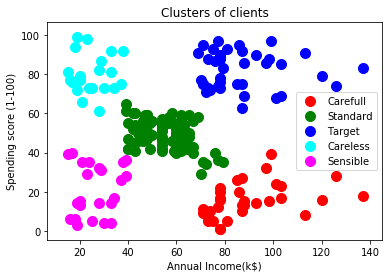

In [13]:
import mlutil as mu
import matplotlib.pyplot as plt

pdir = 'Part 4 - Clustering'

def plot_size(p, fs=[6.0,4.0]):
    p.rcParams['figure.figsize'] = fs
    
def KMeansCluster(k):
    from sklearn.cluster import KMeans
    km = KMeans(n_clusters=k, init='k-means++',
                max_iter=300, n_init=10, random_state=0)
    return km

def elbow(x):
    # find optimal number of clusters using elbow method
    from sklearn.cluster import KMeans
    wcss = [] #inertia
    for i in range(1,11):
        kmeans = KMeansCluster(i)
        kmeans.fit(x)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1,11), wcss)
    plt.title('Elbow method')
    plt.xlabel('Number of clusters K')
    plt.ylabel('wcss')
    return plt

def kplot(x,yk,cluster_centers):
    clrs = ['red', 'green', 'blue', 'cyan', 'magenta']
    clients = ['Carefull', 'Standard', 'Target',
               'Careless', 'Sensible']
    for i in set(yk):
        plt.scatter(x[yk==i, 0], x[yk==i, 1], s=100,
                    c=clrs[i], label=clients[i])
    if cluster_centers:
        plt.scatter(cluster_centers[:,0],
                    cluster_centers[:,1], s=300,
                    c='yellow', label='Centroids')
    plt.title('Clusters of clients')
    plt.xlabel('Annual Income(k$)')
    plt.ylabel('Spending score (1-100)')
    plt.legend()
    return plt

def k_means(p=pdir):
    fname = p + '/Section 24 - K-Means Clustering/'
    fname += 'Mall_Customers.csv'
    x,_ = mu.import_dataset(fname, xs=3, xe=5)
    # find optimal number of clusters using elbow method
    elbow(x).show()

    # applying kmeans to the dataset
    from sklearn.cluster import KMeans
    kmeans = KMeansCluster(5)
    yk = kmeans.fit_predict(x)
    
    # visualising the clusters
    kplot(x,yk,kmeans.cluster_centers_).show()
    return None

def hc_agglomerative(p=pdir):
    fname = p + '/Section 25 - Hierarchical Clustering/'
    fname += 'Mall_Customers.csv'
    x,_ = mu.import_dataset(fname, xs=3, xe=5)
    
    # Using dendogram to find optimal number of clusters
    import scipy.cluster.hierarchy as sch
    dendrogram = sch.dendrogram(
        sch.linkage(x, method='ward')
    )
    plt.title('Dendrogram')
    plt.xlabel('Customers')
    plt.xlabel('Euclidean distances')
    plt.show()
    
    # Fitting HC to dataset
    from sklearn.cluster import AgglomerativeClustering
    hc = AgglomerativeClustering(n_clusters=5,
                                 affinity='euclidean',
                                 linkage='ward')
    yhc = hc.fit_predict(x)
    
    # Visualizing the clusters
    kplot(x,yhc,None).show()
    return None

hc_agglomerative()